[ссылка на статью](https://habr.com/ru/post/335226/)

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_train = pd.read_csv(r'data_mlbc/train.csv', sep=';')
y_train = df_train['cardio']
# df_train.drop(['id', 'cardio'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)
df_test = pd.read_csv(r'data_mlbc/test.csv', sep=';', na_values='None')
del df_test['id']

In [3]:
df_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18888,1,154,85.0,130,80,1,1,0.0,0.0,1.0
1,19042,2,170,69.0,130,90,1,1,NaN,0.0,1.0
2,20432,1,160,70.0,120,75,1,1,0.0,0.0,0.0
3,18133,2,185,94.0,130,90,1,1,NaN,0.0,1.0
4,16093,2,170,76.0,120,80,1,1,0.0,0.0,1.0


In [5]:
all_data = pd.concat([df_train, df_test])

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   age          100000 non-null  int64  
 1   gender       100000 non-null  int64  
 2   height       100000 non-null  int64  
 3   weight       100000 non-null  float64
 4   ap_hi        100000 non-null  int64  
 5   ap_lo        100000 non-null  int64  
 6   cholesterol  100000 non-null  int64  
 7   gluc         100000 non-null  int64  
 8   smoke        96970 non-null   float64
 9   alco         96969 non-null   float64
 10  active       97103 non-null   float64
 11  cardio       70000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 9.9 MB


In [7]:
all_data['gender'].value_counts()

1    64918
2    35082
Name: gender, dtype: int64

In [8]:
all_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,96970.000000,96969.000000,97103.000000,70000.000000
mean,19464.864590,1.350820,164.348140,74.180167,129.253490,96.347990,1.367220,1.225330,0.088048,0.053966,0.804342,0.499700
std,2470.428376,0.477229,8.211187,14.379494,173.639687,181.437372,0.679922,0.570543,0.283366,0.225951,0.396709,0.500003
min,8865.000000,1.000000,50.000000,10.000000,-150.000000,-90.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Таблицы 

In [9]:
# среднее значение кардио в зависомости от хролестерола 
all_data.groupby(['gender','cholesterol'])['cardio'].agg('mean').unstack()

cholesterol,1,2,3
gender,,,
1,0.434555,0.584726,0.770920
2,0.450013,0.637635,0.753288


In [10]:
# среднее значение кардио в зависомости от уровня сахара
all_data.groupby(['gender','gluc'])['cardio'].agg('mean').unstack()

gluc,1,2,3
gender,,,
1,0.475995,0.581089,0.636563
2,0.489004,0.616122,0.590640


In [11]:
# курение 
all_data.groupby(['smoke'])['cardio'].agg('mean')

smoke
0.0    0.502107
1.0    0.474793
Name: cardio, dtype: float64

In [12]:
# алкоголь 
all_data.groupby(['alco'])['cardio'].agg('mean')

alco
0.0    0.500574
1.0    0.484325
Name: cardio, dtype: float64

In [13]:
# добавим столбец тех кто курит и пьет 
all_data['smoke_and_alco'] = all_data[['smoke', 'alco']].apply(lambda x: x[0]*x[1], 1)
all_data.groupby(['smoke_and_alco'])['cardio'].agg('mean')

smoke_and_alco
0.0    0.501203
1.0    0.444444
Name: cardio, dtype: float64

In [14]:
all_data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco
age,1.000000,-0.021165,-0.081445,0.058140,0.022121,0.020135,0.154545,0.099736,-0.045602,-0.029954,-0.011930,0.238159,-0.037235
gender,-0.021165,1.000000,0.498869,0.159714,0.004900,0.014074,-0.034142,-0.016969,0.336510,0.168666,0.008299,0.008109,0.192373
height,-0.081445,0.498869,1.000000,0.293311,0.004176,0.004268,-0.051318,-0.018105,0.186002,0.095394,-0.008312,-0.010821,0.109413
weight,0.058140,0.159714,0.293311,1.000000,0.024353,0.044679,0.139817,0.106538,0.068073,0.068332,-0.019073,0.181660,0.036037
ap_hi,0.022121,0.004900,0.004176,0.024353,1.000000,0.014504,0.018406,0.009896,0.001461,0.000615,0.000372,0.054475,-0.000204
ap_lo,0.020135,0.014074,0.004268,0.044679,0.014504,1.000000,0.026303,0.011327,0.006658,0.011048,0.004392,0.065719,0.007373
cholesterol,0.154545,-0.034142,-0.051318,0.139817,0.018406,0.026303,1.000000,0.447808,0.012531,0.032514,0.010590,0.221147,0.000977
gluc,0.099736,-0.016969,-0.018105,0.106538,0.009896,0.011327,0.447808,1.000000,-0.002280,0.007999,-0.006253,0.089307,-0.011381
smoke,-0.045602,0.336510,0.186002,0.068073,0.001461,0.006658,0.012531,-0.002280,1.000000,0.336155,0.028269,-0.015486,0.528711
alco,-0.029954,0.168666,0.095394,0.068332,0.000615,0.011048,0.032514,0.007999,0.336155,1.000000,0.024351,-0.007330,0.687594


# Потенциальные проблемы 

## Нижнее и верхнее давление 

Text(0, 0.5, 'ap_hi')

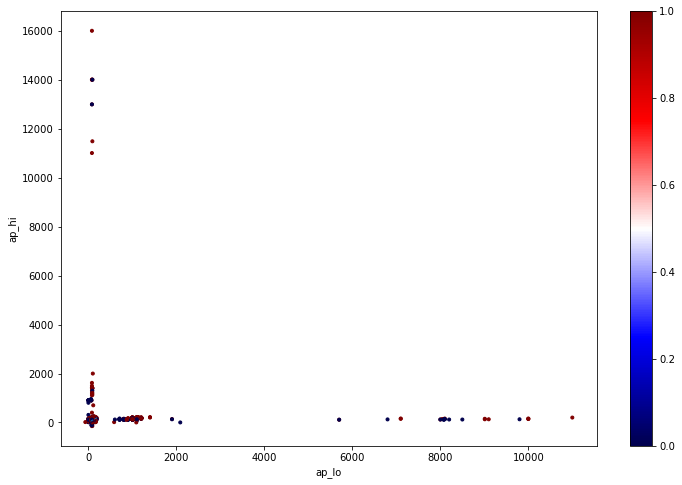

In [15]:
# посмотрим на ниж и верх давление 
plt.figure(figsize=(12, 8))
plt.scatter(all_data.ap_lo, all_data.ap_hi, s=9, c=all_data.cardio, cmap='seismic')
plt.colorbar()
plt.plot([50, 200], [50, 200], '--', linewidth=0.8)
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')

## вес и рост 

Text(0, 0.5, 'height')

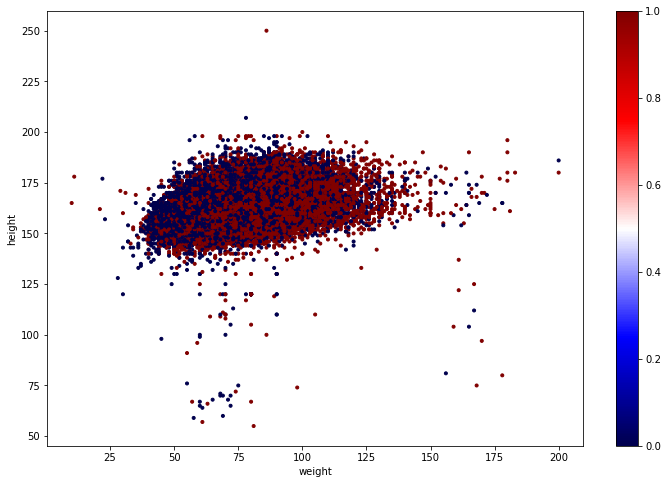

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(all_data.weight, all_data.height, s=9, c=all_data.cardio, cmap='seismic')
plt.colorbar()
# plt.plot([50, 200], [50, 200], '--', linewidth=0.8)
plt.xlabel('weight')
plt.ylabel('height')

## способы нахождения аномалий 

<AxesSubplot:xlabel='weight', ylabel='Count'>

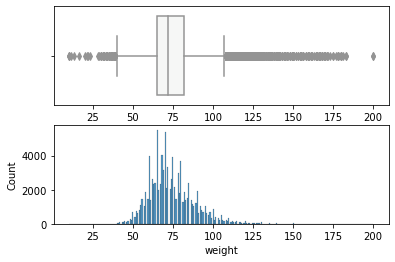

In [17]:
# диаграма размаха 
f, axes = plt.subplots(2, 1)

sns.boxplot(x='weight', data=all_data, palette='PRGn', ax=axes[0])
sns.histplot(x='weight', data=all_data, ax=axes[1])

<AxesSubplot:xlabel='height', ylabel='Count'>

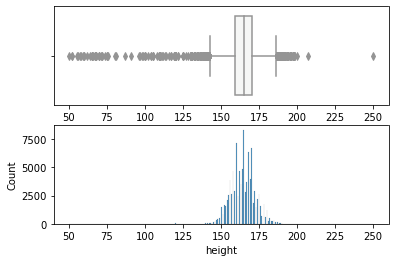

In [18]:
f, axes = plt.subplots(2, 1)

sns.boxplot(x='height', data=all_data, palette='PRGn', ax=axes[0])
sns.histplot(x='height', data=all_data, ax=axes[1])

<AxesSubplot:xlabel='age', ylabel='Count'>

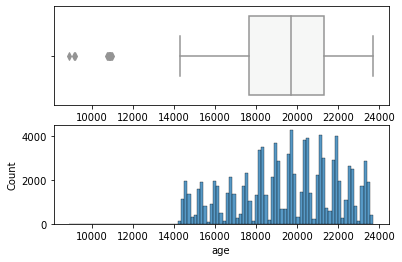

In [19]:
f, axes = plt.subplots(2, 1)

sns.boxplot(x='age', data=all_data, palette='PRGn', ax=axes[0])
sns.histplot(x='age', data=all_data, ax=axes[1])

## Произведем очистку данных и построим занова графики  

### Исправление роста/веса

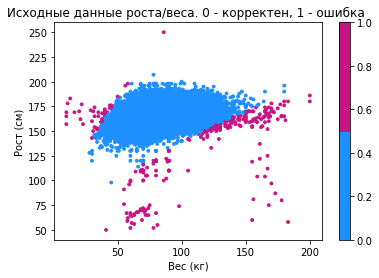

In [21]:
# данные сейчас 
all_data['imt'] = all_data.weight / (np.square(all_data.height) / 10000)

plt.scatter(all_data.weight, all_data.height, 
            c=((all_data.imt < 15) | (all_data.imt > 52)), s = 8, 
            cmap=ListedColormap(['dodgerblue','mediumvioletred']))

plt.colorbar()
plt.title('Исходные данные роста/веса. 0 - корректен, 1 - ошибка ')
plt.xlabel('Вес (кг)')
plt.ylabel('Рост (см)')

del all_data

In [22]:
def deviate_weight_height(Data, min_imt = 17, max_imt=50, coef_height = 24, coef_weight = 24, coef_age = 720):
        """Обработка некорректных данных в Data в столбцах 'weight', 'height'
        --------
        Некорректными считались данные пациентов, у которых Индекс Массы Тела -
        ИМТ < min_imt (дистрофия) или ИМТ > max_imt (сверх ожирение)
        --------
        Параметры
        --------
        * max_imt - максимальный индекс ИМТ, говорящий об ожирении
        * min_imt - минимальный индекс ИМТ, говорящий о дистрофии
        * coef_height - ИМТ для рассчета веса по росту
        * coef_weight - ИМТ для рассчета роста по весу
        * coef_age - допустимый отступ от реального возраста влево/вправо для взятия среднего по росту и весу
        """

        tmp_Data = Data.copy()
        # переводим рост в метры
        tmp_Data['height'] /= 100
        tmp_Data['imt'] = tmp_Data['weight'] / (tmp_Data['height'] * tmp_Data['height'])
        # выбор строк с некорректными данными
        dev_Data = tmp_Data[(tmp_Data['imt'] > max_imt) | (tmp_Data['imt'] < min_imt)]
        # выбор строк с корректными данными
        not_dev_Data = tmp_Data[(tmp_Data['imt'] < max_imt) | (tmp_Data['imt'] > min_imt)]

        new_weight = []
        new_height = []
        
        for imt, weight, height, age in zip(dev_Data['imt'],dev_Data['weight'], dev_Data['height'], dev_Data['age']):
            # если рост - нормальный, рассчитываем вес по росту
            if height > 1.20 and height < 2.30:
                weight = coef_height * height * height
            # если вес - нормальный, рассчитываем рост по весу
            elif weight > 30 and weight < 120:
                height = math.sqrt(weight / coef_weight)
            # иначе берем средний рост и вес по пациентам, возраст которых + - 2 года от возраста нашего пациента
            else:
                filter_Data = not_dev_Data[(not_dev_Data['age'] < age + coef_age) &
                                            (not_dev_Data['age'] > age - coef_age)]
                height = filter_Data['height'].mean()
                weight = filter_Data['weight'].mean()
                
            new_height.append(height)
            new_weight.append(weight)

        # изменяем некорректные значения на скорректированные
        mask = (tmp_Data['imt'] > max_imt) | (tmp_Data['imt'] < min_imt)
        
        tmp_Data['height'][mask] = pd.Series(new_height, index=dev_Data.index)
        tmp_Data['weight'][mask] = pd.Series(new_weight, index=dev_Data.index)
        # переводим рост в сантиметры
        tmp_Data['height'] *= 100
        # удаляем вставленный столбец с ИМТ
        tmp_Data = tmp_Data.drop('imt', axis=1)
        return tmp_Data

In [23]:
df_train = deviate_weight_height(df_train, max_imt=52, min_imt=15)
df_test = deviate_weight_height(df_test, max_imt=52, min_imt=15)

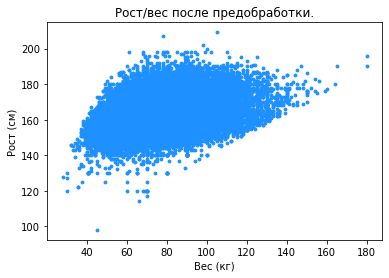

In [24]:
all_data_normal_weight_height = pd.concat([df_train, df_test])

plt.scatter(all_data_normal_weight_height.weight, all_data_normal_weight_height.height, s = 8, c = 'dodgerblue')
plt.title('Рост/вес после предобработки.')
plt.xlabel('Вес (кг)')
plt.ylabel('Рост (см)')
del all_data_normal_weight_height

### Исправление давления

In [25]:
def deviate_arterial_pressure(Data):
    """Обработка некорректных данных в Data в столбцах 'ap_hi', 'ap_lo'
    --------
    Некорректными данными считались данные, в которых верхнее давление ниже нижнего,
    верхнее давление < 30 или >300, нижнее < 30 или выше 200
    --------
    Предполагаем, что верхнее давление может быть [малое (<30), нормальное (>30 && <300), большое (>300)]
    Предполагаем, что нижнее давление может быть [малое (<10), нормальное (>10 && <300), большое (>200)]
    """
    # перевод отрицательных значений в положительные целые
    df_abs = Data
    df_abs[['ap_hi', 'ap_lo']] = Data[['ap_hi', 'ap_lo']].abs().astype(int)

    # выбор тех строк таблицы, которые содержат неверные данные о давлении
    mask = (df_abs['ap_hi'] > 300) | (df_abs['ap_hi'] < 30) | (df_abs['ap_lo'] > 200) | (df_abs['ap_lo'] < 10)
    dev_data = df_abs[['ap_hi', 'ap_lo']][mask]

    # средние нормальные давления
    ap_hi_mean = df_abs['ap_hi'].mean()
    ap_lo_mean = df_abs['ap_lo'].mean()

    new_ap_hi = []
    new_ap_lo = []
        
    for ap_hi, ap_lo in zip(dev_data['ap_hi'], dev_data['ap_lo']):
        err_flag = True
        
        # оба давления в норме
        if ap_hi < 300 and ap_hi > 30 and ap_lo < 200 and ap_lo > 10 and ap_hi > ap_lo:
            err_flag = False
            new_ap_hi.append(ap_hi)
            new_ap_lo.append(ap_lo)
                
        # верхнее норма, нижнее большое (160/1100 -> 160/110)
        elif ap_hi < 300 and ap_hi > 30 and ap_lo > 200:
            tmp_ap_hi = ap_hi
            tmp_ap_lo = ap_lo
            f = True
            while(len(str(ap_lo))>1):
                ap_lo /= 10
                ap_lo = math.trunc(ap_lo)
                if ap_lo < 300 and ap_hi > ap_lo:
                    f = False
                    err_flag = False
                    new_ap_lo.append(ap_lo)
                    new_ap_hi.append(ap_hi)
                    break
            if f:
                ap_hi, ap_lo = tmp_ap_hi, tmp_ap_lo
                    
        # верхнее большое, нижнее норма (1600/90 -> 160/90)
        elif ap_hi > 300 and ap_lo < 200 and ap_lo > 10:
            tmp_ap_hi = ap_hi
            tmp_ap_lo = ap_lo
            f = True
            while(len(str(ap_hi) )> 1):
                ap_hi /= 10
                ap_hi = math.trunc(ap_hi)
                if ap_hi < 300 and ap_hi > ap_lo:
                    f = False
                    err_flag = False
                    new_ap_lo.append(ap_lo)
                    new_ap_hi.append(ap_hi)
                    break
            if f:
                ap_hi, ap_lo = tmp_ap_hi, tmp_ap_lo
                    
        # верхнее большое, нижнее малое (906/0 -> 90/60)
        elif ap_hi > 300 and ap_lo < 10:
            mod = ap_hi % 10
            ap_hi /= 10
            ap_hi = math.trunc(ap_hi)
            ap_lo = int(str(mod) + str(ap_lo))
            if ap_hi < 300 and ap_lo > 10 and ap_hi > ap_lo:
                err_flag = False
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
                    
        # верхнее малое, нижнее большое (9/770 -> 97/70)
        elif ap_hi < 30 and ap_lo > 200:
            len_ap_lo = len(str(ap_lo))
            first_digit = ap_lo / int('1' + '0' * (len_ap_lo - 1))
            first_digit = math.trunc(first_digit)
            ap_lo = ap_lo % int('1' + '0' * (len_ap_lo - 1))
            ap_hi = int(str(ap_hi) + str(first_digit))
            if ap_hi < 300 and ap_lo > 10 and ap_hi > ap_lo:
                err_flag = False
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
                    
        # верхнее норма, нижнее малое (120/8 -> 120/80)
        elif ap_hi < 300 and ap_hi > 10 and ap_lo < 10 and ap_lo != 0:
            ap_lo *= 10
            if ap_lo > 10 and ap_hi > ap_lo:
                err_flag = False
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
                    
        # верхнее малое, нижнее норма (8/60 -> 80/60)
        elif ap_hi < 30 and ap_lo < 200 and ap_lo > 10 and ap_hi != 0:
            ap_hi *= 10
            if ap_hi > 10 and ap_hi > ap_lo:
                err_flag = False
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
            
        # ошибка в давлении не исправлена
        if err_flag:
                
            # если оба давления нормальны, но они переставлены местами -> переставляем их (90/180 -> 180/90)
            if ap_hi < 300 and ap_hi > 30 and ap_lo < 200 and ap_lo > 10 and ap_hi < ap_lo:
                ap_hi, ap_lo = ap_lo, ap_hi
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
                
            # если верхнее давление нормально, а нижнее с отклонением, заменяем нижнее на среднее
            elif ap_hi < 300 and ap_hi > 30:
                ap_lo = df_abs['ap_lo'][df_abs['ap_hi'] == ap_hi].mean()
                if ap_hi < ap_lo:
                    ap_hi, ap_lo = ap_lo, ap_hi
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
                if math.isnan(new_ap_lo[-1]) or math.isnan(new_ap_hi[-1]):
                    new_ap_lo[-1] = ap_lo_mean
                    new_ap_hi[-1] = ap_hi_mean
                        
            # если нижнее давление нормально, а а верхнее с отклонением, заменяем верхнее на среднее
            elif ap_lo < 200 and ap_lo > 10:
                ap_hi = df_abs['ap_hi'][df_abs['ap_lo'] == ap_lo].mean()
                if ap_hi < ap_lo:
                    ap_hi, ap_lo = ap_lo, ap_hi
                new_ap_lo.append(ap_lo)
                new_ap_hi.append(ap_hi)
                if math.isnan(new_ap_lo[-1]) or math.isnan(new_ap_hi[-1]):
                    new_ap_lo[-1] = ap_lo_mean
                    new_ap_hi[-1] = ap_hi_mean
                        
            # заменяем оба значения давления на средние по всей выборке
            else:
                new_ap_lo.append(ap_lo_mean)
                new_ap_hi.append(ap_hi_mean)
                    
    ap_lo_Series = pd.Series(new_ap_lo, index=dev_data['ap_lo'].index)
    ap_hi_Series = pd.Series(new_ap_hi, index=dev_data['ap_hi'].index)

    # Замена неверных значений исправленными
    mask = (df_abs['ap_hi'] > 300) | (df_abs['ap_hi'] < 30) | (df_abs['ap_lo'] > 200) | (df_abs['ap_lo'] < 10)
    df_abs['ap_hi'][mask] = ap_hi_Series
    mask = (df_abs['ap_hi'] > 300) | (df_abs['ap_hi'] < 30) | (df_abs['ap_lo'] > 200) | (df_abs['ap_lo'] < 10)
    df_abs['ap_lo'][mask] = ap_lo_Series

    return df_abs

In [26]:
df_train = deviate_arterial_pressure(df_train)
df_test = deviate_arterial_pressure(df_test)

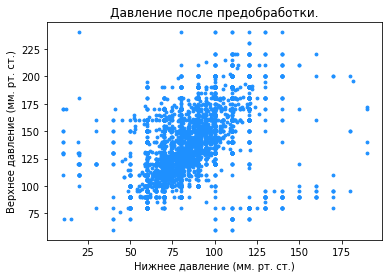

In [27]:
all_data_normal_pressure = pd.concat([df_train, df_test])

plt.scatter(all_data_normal_pressure.ap_lo, all_data_normal_pressure.ap_hi, s = 8, c = 'dodgerblue')
plt.title('Давление после предобработки.')
plt.xlabel('Нижнее давление (мм. рт. ст.)')
plt.ylabel('Верхнее давление (мм. рт. ст.)')

del all_data_normal_pressure

In [28]:
all_data = pd.concat([df_train, df_test])

<AxesSubplot:xlabel='weight', ylabel='Count'>

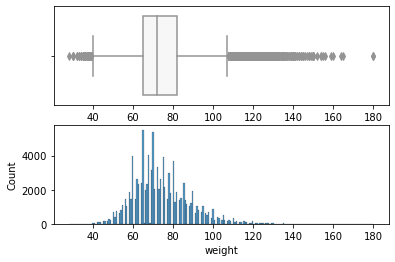

In [29]:
f, axes = plt.subplots(2, 1)

sns.boxplot(x='weight', data=all_data, palette='PRGn', ax=axes[0])
sns.histplot(x='weight', data=all_data, ax=axes[1])

<AxesSubplot:xlabel='height', ylabel='Count'>

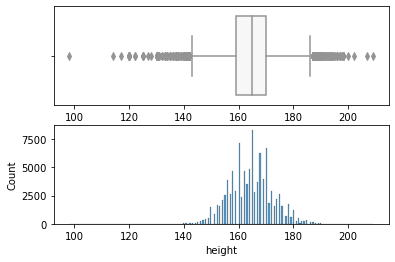

In [30]:
f, axes = plt.subplots(2, 1)

sns.boxplot(x='height', data=all_data, palette='PRGn', ax=axes[0])
sns.histplot(x='height', data=all_data, ax=axes[1])

<AxesSubplot:xlabel='age', ylabel='Count'>

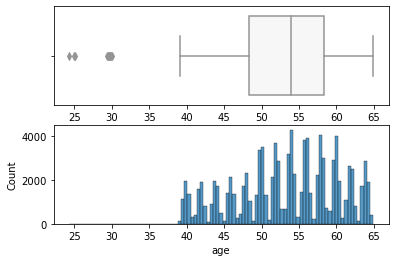

In [31]:
# переводим возраст в годы
all_data['age'] /= 365.25

f, axes = plt.subplots(2, 1)

sns.boxplot(x='age', data=all_data, palette='PRGn', ax=axes[0])
sns.histplot(x='age', data=all_data, ax=axes[1])

In [32]:
all_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,96970.000000,96969.000000,97103.000000,70000.000000
mean,53.291895,1.350820,164.429772,74.054038,127.006912,81.637231,1.367220,1.225330,0.088048,0.053966,0.804342,0.499700
std,6.763664,0.477229,7.892389,14.035370,17.088264,10.009934,0.679922,0.570543,0.283366,0.225951,0.396709,0.500003
min,24.271047,1.000000,98.000000,28.000000,60.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.355921,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.935661,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.381930,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,209.165007,180.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


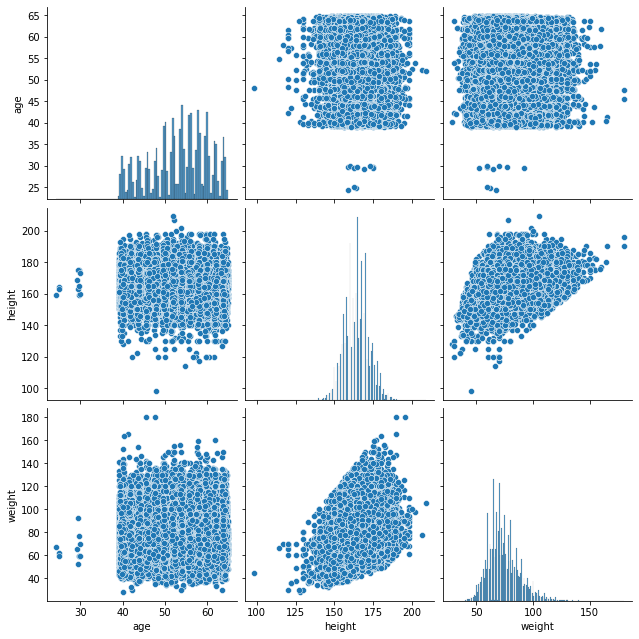

In [33]:
sns.pairplot(all_data[['age', 'height', 'weight']], size=3)

## Посмотрим на распределение признаков в наборе данных 

может были сделанные другие преопразования в колонке gender 
но код с вебинара не получается, ругается на gender

пробовал через pandas.DataFrame.replace
```python
df['gender'] = df['gender'].replace([1, 2], ['male', 'female'], inplace=True) 
```
но не помогло 

In [ ]:
# # распределение зависимое от пола 
# data_long = pd.melt(all_data, id_vars=['age', 'height', 'weight'], value_vars='gender', var_name='feature')

# g = sns.FacetGrid(data_long, col="feature", row='gender', col_wrap=2,
#                  sharex=False, size=6, legend_out=True)

# g.map(sns.histplot, 'value')

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

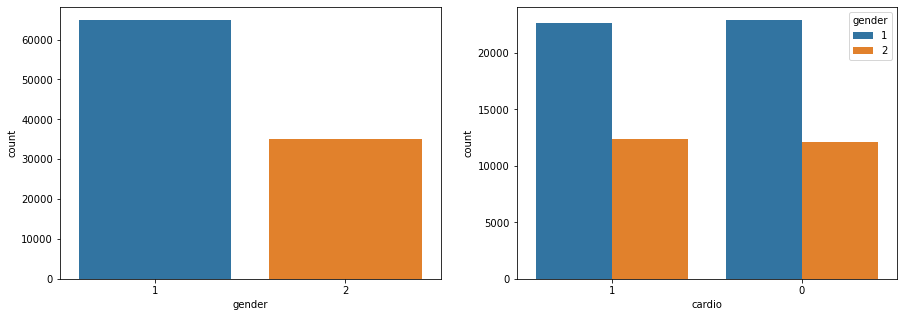

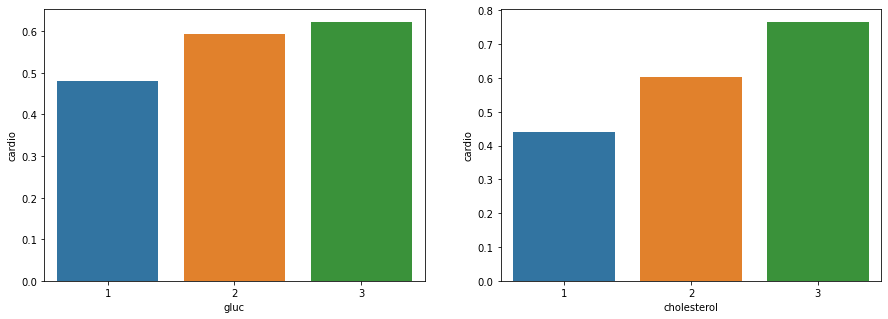

In [34]:
# сколько мужчин и женщин и соотношение кардио 0/1 у мужчин и женщин 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
fig, (axis3, axis4) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='gender', data=all_data, ax=axis1)
sns.countplot(x='cardio', hue='gender', data=all_data, order=[1, 0], ax=axis2)

data_gluc = all_data[['gluc', 'cardio']].groupby(['gluc'], as_index=False).mean()
sns.barplot(x='gluc', y='cardio', data=data_gluc, order=[1,2,3], ax=axis3)

data_chole = all_data[['cholesterol', 'cardio']].groupby(['cholesterol'], as_index=False).mean()
sns.barplot(x='cholesterol', y='cardio', data=data_chole, order=[1,2,3], ax=axis4)

<AxesSubplot:xlabel='cardio', ylabel='count'>

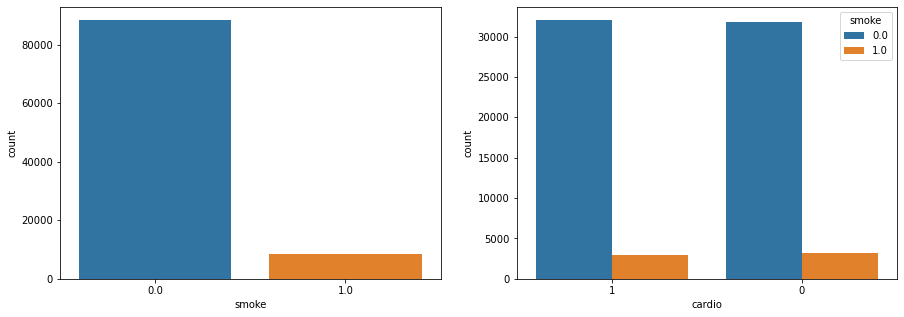

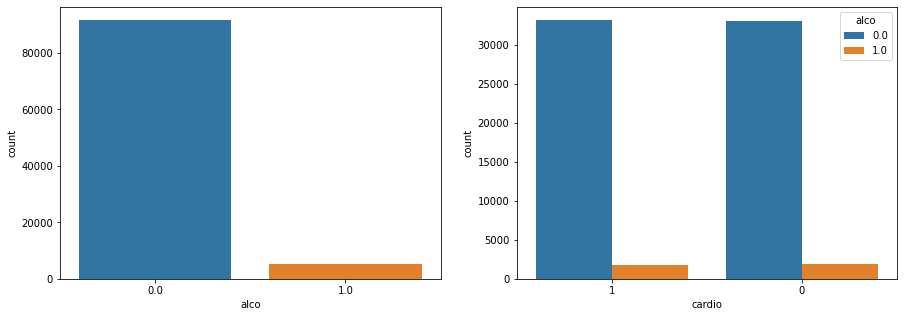

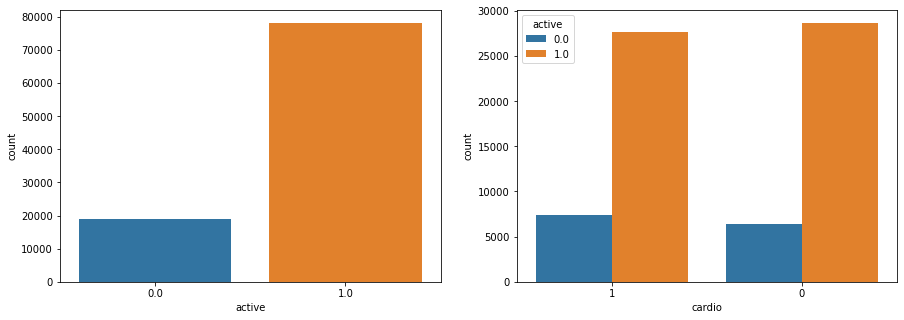

In [35]:
# посмотрим сколько больных в зависимости от курения, алкоголя и активного образа жизни 

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
fig, (axis3, axis4) = plt.subplots(1, 2, figsize=(15, 5))
fig, (axis5, axis6) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='smoke', data=all_data, ax=axis1)
sns.countplot(x='cardio', hue='smoke', data=all_data, order=[1, 0], ax=axis2)

sns.countplot(x='alco', data=all_data, ax=axis3)
sns.countplot(x='cardio', hue='alco', data=all_data, order=[1, 0], ax=axis4)

sns.countplot(x='active', data=all_data, ax=axis5)
sns.countplot(x='cardio', hue='active', data=all_data, order=[1, 0], ax=axis6)

<AxesSubplot:xlabel='age', ylabel='Count'>

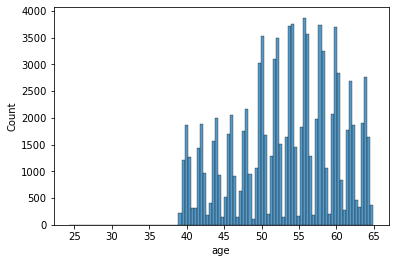

In [36]:
# посмотри на возрост 
sns.histplot(all_data['age'], label='Age', bins=100)

Text(0, 0.5, 'ap_hi')

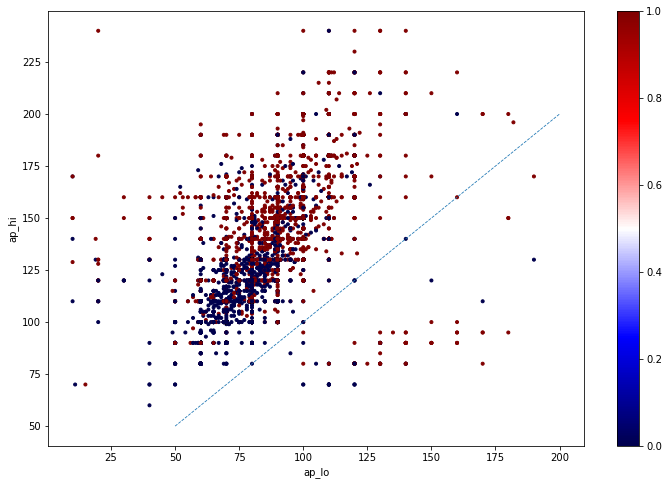

In [37]:
# посмотрим на ниж и верх давление после очистки 
plt.figure(figsize=(12, 8))
plt.scatter(all_data.ap_lo, all_data.ap_hi, s=9, c=all_data.cardio, cmap='seismic')
plt.colorbar()
plt.plot([50, 200], [50, 200], '--', linewidth=0.8)
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')

In [38]:
all_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168.0,62.0,110.0,80.0,1,1,0.0,0.0,1.0,0.0
1,55.381246,1,156.0,85.0,140.0,90.0,3,1,0.0,0.0,1.0,1.0
2,51.627652,1,165.0,64.0,130.0,70.0,3,1,0.0,0.0,0.0,1.0
3,48.249144,2,169.0,82.0,150.0,100.0,1,1,0.0,0.0,1.0,1.0
4,47.841205,1,156.0,56.0,100.0,60.0,1,1,0.0,0.0,0.0,0.0


## Создадим новые признаки и построим графики для них

In [39]:
# индекс массы тела
all_data['bmi'] = pd.qcut((all_data.weight/all_data.height/100)**2, 25, labels=False)

# разница между верхним и нижним давлением 
all_data['ap_hi_ap_lo_diff'] = all_data['ap_hi'] - all_data['ap_lo']

# является ли давление нормальным 
all_data['ap_norm'] = ((all_data.ap_hi.between(85, 125)) & (all_data.ap_lo.between(55, 85))).astype('int')

In [40]:
all_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_hi_ap_lo_diff,ap_norm
0,50.357290,2,168.0,62.0,110.0,80.0,1,1,0.0,0.0,1.0,0.0,3,30.0,1
1,55.381246,1,156.0,85.0,140.0,90.0,3,1,0.0,0.0,1.0,1.0,21,50.0,0
2,51.627652,1,165.0,64.0,130.0,70.0,3,1,0.0,0.0,0.0,1.0,5,60.0,0
3,48.249144,2,169.0,82.0,150.0,100.0,1,1,0.0,0.0,1.0,1.0,17,50.0,0
4,47.841205,1,156.0,56.0,100.0,60.0,1,1,0.0,0.0,0.0,0.0,2,40.0,1


<AxesSubplot:xlabel='cardio', ylabel='count'>

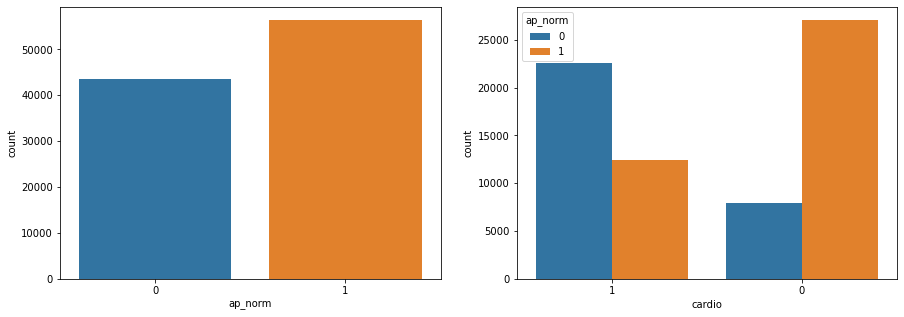

In [41]:
# посмотрим сколько у нас тех у кого давление в норме и сколько среди них больные 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='ap_norm', data=all_data, ax=axis1)
sns.countplot(x='cardio', hue='ap_norm', data=all_data, order=[1, 0], ax=axis2)

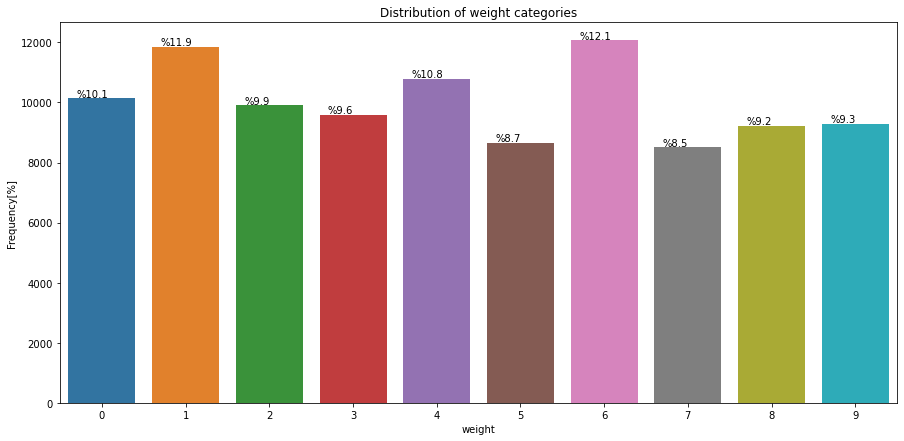

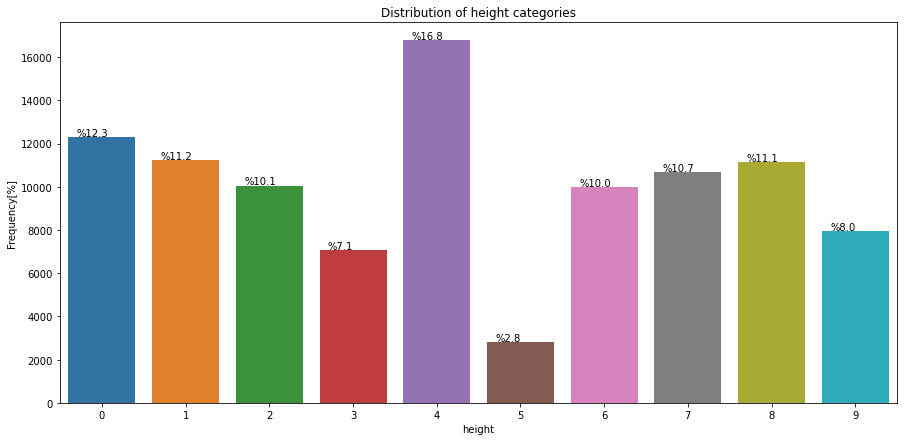

In [42]:
# закодируем рост и вес. из вещественных признаков получим категориальные 
all_data.weight = pd.qcut(all_data.weight, 10, labels=False)
all_data.height = pd.qcut(all_data.height, 10, labels=False)

# вес
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='weight', data=all_data)
plt.title('Distribution of weight categories')
plt.xlabel('weight')
plt.ylabel('Frequency[%]')

for p in ax.patches:
    ax.annotate('%{:.1f}'.format(p.get_height()/1000.0), (p.get_x()+0.1, p.get_height()+50))
    

# рост
# вес
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='height', data=all_data)
plt.title('Distribution of height categories')
plt.xlabel('height')
plt.ylabel('Frequency[%]')

for p in ax.patches:
    ax.annotate('%{:.1f}'.format(p.get_height()/1000.0), (p.get_x()+0.1, p.get_height()+50))
    